**Problem Statement-**<br>To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
# Importing Libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir_train = pathlib.Path('/content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [5]:
# Defining Parameters
batch_size = 32 # as mentioned
image_height = 180 # as mentioned
image_width=180 # as mentioned

- Using 80% of image for Training and 20 % for validation

In [6]:
# Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size = batch_size, image_size=(image_height, image_width), seed=123,
                                                               validation_split=0.2, subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, batch_size=batch_size, image_size = (image_height, image_width), seed = 123,
                                                             validation_split = 0.2, subset='validation')

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [8]:
# List of all the classes of skin cancer
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualizing the data

<ipython-input-10-90e4f75d73e0>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3,3,i+1)


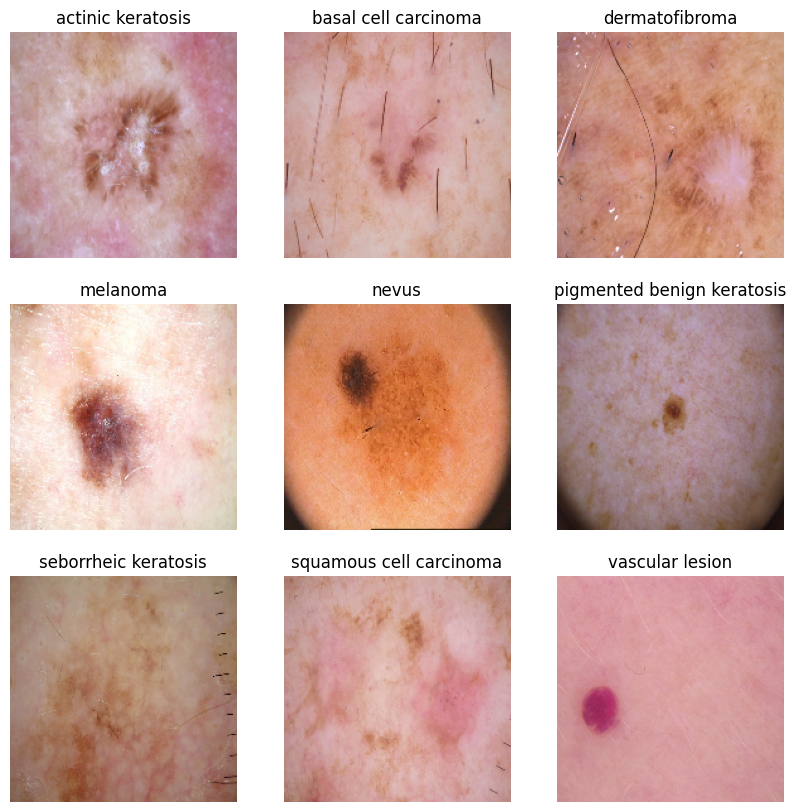

In [10]:
one_image_per_class = {}

# Iterate over the dataset to get one image from each class
for images, labels in train_ds:
    for image, label in zip(images, labels):
        class_name = class_names[label]
        if class_name not in one_image_per_class:
            one_image_per_class[class_name] = image
            break

# Print one image from each class
fig, axs = plt.subplots(1, len(class_names), figsize=(10, 10))
for i, class_name in enumerate(class_names):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(one_image_per_class[class_name].numpy().astype("uint8"))
  plt.title(class_name)
  plt.axis('off')
plt.show()

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the model

In [12]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Activation, Flatten

In [13]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

### Compile the model

In [14]:
#compile the model
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                    

### Training the Model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 43ms/step - loss: 1.8440 - accuracy: 0.3253 - val_loss: 2.3504 - val_accuracy: 0.1739
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 1.7504 - accuracy: 0.3789 - val_loss: 2.1905 - val_accuracy: 0.2609
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 1.6998 - accuracy: 0.4035 - val_loss: 2.4192 - val_accuracy: 0.2174
Epoch 4/20
56/56 [==============================] - 2s 40ms/step - loss: 1.6151 - accuracy: 0.4235 - val_loss: 2.1359 - val_accuracy: 0.3478
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.5277 - accuracy: 0.4676 - val_loss: 2.0839 - val_accuracy: 0.3043
Epoch 6/20
56/56 [==============================] - 2s 41ms/step - loss: 1.4635 - accuracy: 0.4916 - val_loss: 2.3822 - val_accuracy: 0.3043
Epoch 7/20
56/56 [==============================] - 2s 42ms/step - loss: 1.4216 - accuracy: 0.5039 - val_loss: 2.4319 - val_accuracy: 0.2609
Epoch 8/20
56

### Visualizing the Result

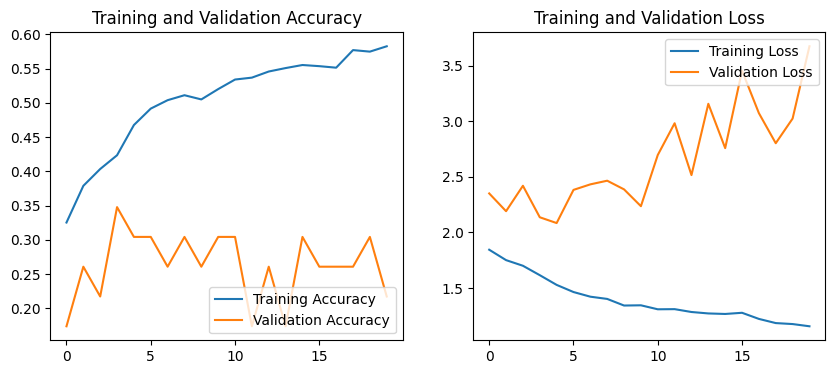

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations

- From the plot above and we can observe that it is a case of overfitting
- The Training accuracy and Validation accuracy are 0.58 and 0.21 (difference of ~0.37)
- The training loss is going down with every epoch but the validation loss is increasing

In [19]:
# Data Augmentation 
data_augmentation = Sequential()
data_augmentation.add(layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical', seed=123, input_shape=(image_height, image_width, 3)))
data_augmentation.add(layers.experimental.preprocessing.RandomRotation(0.1))
data_augmentation.add(layers.experimental.preprocessing.RandomZoom(0.1))

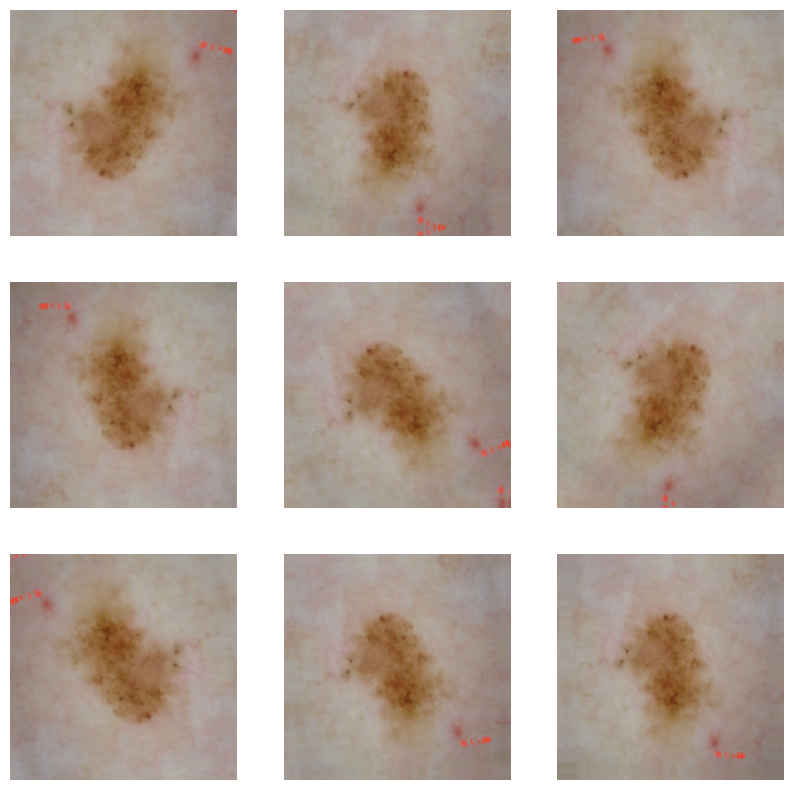

In [20]:
#Visualization of Augmentation Strategy
plt.figure(figsize=[10,10])
for images, labels in train_ds.take(1):
  for i in range(0,9):
    x = data_augmentation(images)
    plt.subplot(3,3,i+1)
    plt.imshow(x[0].numpy().astype('uint8'))
    plt.axis('off')

### Creating new model

In [21]:
model2 = Sequential()
model2.add(data_augmentation)
model2.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(9, activation='softmax'))

In [22]:
model2.compile(optimizer = 'Adam', 
               loss = 'sparse_categorical_crossentropy', 
               metrics=['accuracy'])

In [23]:
epochs =20
history=model2.fit(train_ds,
                   validation_data=val_ds,
                   epochs=epochs)

Epoch 1/20
56/56 [==============================] - 5s 46ms/step - loss: 2.2196 - accuracy: 0.2015 - val_loss: 2.3541 - val_accuracy: 0.0435
Epoch 2/20
56/56 [==============================] - 2s 43ms/step - loss: 1.9360 - accuracy: 0.3008 - val_loss: 2.2870 - val_accuracy: 0.1304
Epoch 3/20
56/56 [==============================] - 3s 45ms/step - loss: 1.7719 - accuracy: 0.3633 - val_loss: 2.1968 - val_accuracy: 0.2609
Epoch 4/20
56/56 [==============================] - 2s 45ms/step - loss: 1.7124 - accuracy: 0.3873 - val_loss: 2.2644 - val_accuracy: 0.2174
Epoch 5/20
56/56 [==============================] - 2s 42ms/step - loss: 1.5912 - accuracy: 0.4448 - val_loss: 2.0054 - val_accuracy: 0.3478
Epoch 6/20
56/56 [==============================] - 2s 42ms/step - loss: 1.5291 - accuracy: 0.4782 - val_loss: 2.0296 - val_accuracy: 0.3043
Epoch 7/20
56/56 [==============================] - 2s 42ms/step - loss: 1.4844 - accuracy: 0.4894 - val_loss: 2.1486 - val_accuracy: 0.3043
Epoch 8/20
56

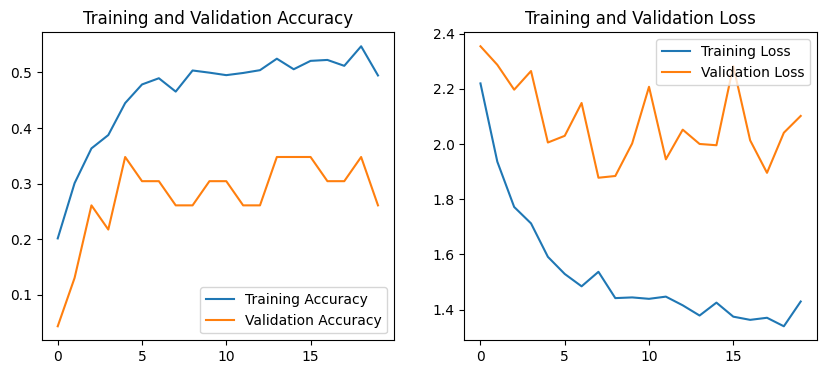

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observation <br>
- From the training and test accuracy above, we can observe that there is a significant improvement in the model performance as the training accuracy is 0.49 and validation accuracy is 0.26 (diff of ~0.23)
- However we can observe from the plot above that the model is still overfitting
- The training loss is going down but the validation loss is increasing

### Checking the distribution of classes in data

In [25]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

Q) Which class has the least number of samples?
- seborrheic keratosis has the least number of samples. <br>

Q) Which classes dominate the data in terms proportionate number of samples?
-  pigmented benign keratosis dominates the data in terms proportionate number of samples.

### Rectify the class imbalance

In [26]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
path_to_training_dataset= pathlib.Path('/content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) +"/"+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5D03EC7EE0>: 100%|██████████| 500/500 [00:24<00:00, 20.78 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5D03D1B700>: 100%|██████████| 500/500 [00:21<00:00, 23.16 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5CFC405300>: 100%|██████████| 500/500 [00:24<00:00, 20.38 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2126x2185 at 0x7F5CFC3FF760>: 100%|██████████| 500/500 [02:08<00:00,  3.89 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F5D03F0E6E0>: 100%|██████████| 500/500 [01:55<00:00,  4.32 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5D03FDEEF0>: 100%|██████████| 500/500 [00:24<00:00, 20.54 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5D03E1E200>: 100%|██████████| 500/500 [00:51<00:00,  9.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5CFC24F9A0>: 100%|██████████| 500/500 [00:24<00:00, 20.22 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5D03E507C0>: 100%|██████████| 500/500 [00:25<00:00, 19.94 Samples/s]


In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [29]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010379.jpg_bae9092f-d621-4097-b519-3ab84cf2bd8e.jpg',
 '/content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000162.jpg_629f1213-817f-45c8-895a-90d10b9bce6a.jpg',
 '/content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011099.jpg_fd6e0045-7033-49d5-85aa-16d53ce5fc6b.jpg',
 '/content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010143.jpg_4a375151-3b03-485d-be34-087199294a4f.jpg',
 '/content/drive/MyDrive/vishwajeet/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010364.jpg_ca81cf5b-3521-4e50-8bcd-0369149efe79.jpg',
 '/content

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma']

In [31]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-32-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

- The results after adding 500 sampes to original classes

In [34]:
batch_size = 32
img_height = 180
img_width = 180

### Creating a training dataset

In [35]:
data_dir_train= data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Creating a testing dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Creating model (with Normalization)

In [37]:
# creating model
model3 = Sequential()
model3.add(data_augmentation)
model3.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model3.add(Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(32, (3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(9, activation='softmax'))

In [38]:
#compiling model
model3.compile(optimizer='Adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [39]:
# training the model
epochs = 50
history = model3.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 45s 238ms/step - loss: 2.7960 - accuracy: 0.2047 - val_loss: 19.1624 - val_accuracy: 0.1054
Epoch 2/50
169/169 [==============================] - 40s 229ms/step - loss: 2.0583 - accuracy: 0.2207 - val_loss: 12.3043 - val_accuracy: 0.1024
Epoch 3/50
169/169 [==============================] - 42s 242ms/step - loss: 1.9844 - accuracy: 0.2359 - val_loss: 2.6745 - val_accuracy: 0.1240
Epoch 4/50
169/169 [==============================] - 38s 221ms/step - loss: 1.9789 - accuracy: 0.2268 - val_loss: 2.6834 - val_accuracy: 0.2673
Epoch 5/50
169/169 [==============================] - 38s 217ms/step - loss: 1.9127 - accuracy: 0.2723 - val_loss: 2.5682 - val_accuracy: 0.2301
Epoch 6/50
169/169 [==============================] - 38s 218ms/step - loss: 1.9157 - accuracy: 0.2611 - val_loss: 4.7174 - val_accuracy: 0.1737
Epoch 7/50
169/169 [==============================] - 38s 218ms/step - loss: 1.8559 - accuracy: 0.2661 - val_loss: 2.0251 - val_

### Visualizing the model

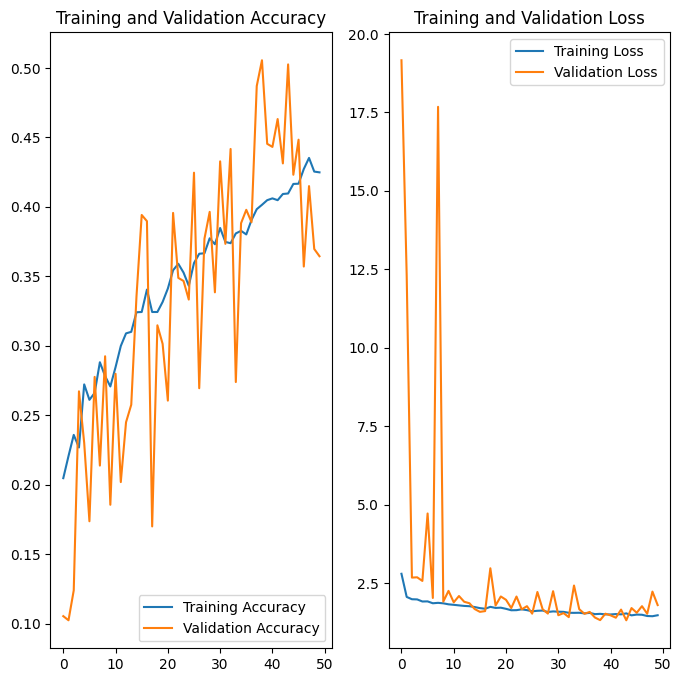

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Final Observations

- The training accuracy and validation accuracy are much closer 0.42 and 0.36 (with a difference of ~0.06)
- The class rebalancing seems to make a difference as now training accuracy and validation accuracy have a difference of ~0.06
- From the plot above we can say that the problem of overfitting seems to be nearly solved. 
- The training and validation loss seems to be decreasing with every epoch. 